In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f5066e75-cf0d-4016-8eec-7d20ee907819',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [6]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df=pd.json_normalize(data['data'])
df['timestamp']=pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10085,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931262e+07,1.931262e+07,...,41.9126,4.508885e+11,None,2023-03-09T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 19:59:33.439698
1,1027,Ethereum,ETH,ethereum,6562,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,18.8962,1.869478e+11,None,2023-03-09T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 19:59:33.439698
2,825,Tether,USDT,tether,49011,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.174048e+10,7.314177e+10,...,7.2502,7.313256e+10,None,2023-03-09T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-09 19:59:33.439698
3,1839,BNB,BNB,bnb,1210,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578934e+08,1.599800e+08,...,4.5890,4.600165e+10,None,2023-03-09T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 19:59:33.439698
4,3408,USD Coin,USDC,usd-coin,10505,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.336810e+10,4.336810e+10,...,4.3837,4.337039e+10,None,2023-03-09T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-09 19:59:33.439698
5,52,XRP,XRP,xrp,901,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,...,1.9964,3.876539e+10,None,2023-03-09T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 19:59:33.439698
6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.468679e+10,3.555603e+10,...,1.1104,1.425260e+10,None,2023-03-09T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 19:59:33.439698
7,74,Dogecoin,DOGE,dogecoin,654,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,0.9572,9.469574e+09,None,2023-03-09T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 19:59:33.439698
8,3890,Polygon,MATIC,polygon,607,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,...,0.9419,1.066842e+10,None,2023-03-09T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 19:59:33.439698
9,4687,Binance USD,BUSD,binance-usd,6383,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,8.401286e+09,8.401286e+09,...,0.8493,8.404179e+09,None,2023-03-09T17:57:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-03-09 19:59:33.439698


In [10]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df 
    
    #appending data to csv file
    if not os.path.isfile(r'C:\Users\kalli\api.csv'):              
        df.to_csv(r'C:\Users\kalli\api.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\kalli\api.csv', mode='a', header=False)
                    

In [11]:
#code to automatically run the function above 
import os 
from time import time
from time import sleep

for a in range(333):
    api_runner()
    print('Success')
    sleep(60) 
exit()

C:\Users\kalli\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Success


C:\Users\kalli\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Success


KeyboardInterrupt: 

In [12]:
df98=pd.read_csv(r'C:\Users\kalli\api.csv')
df98

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10085,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.931276e+07,...,41.8684,4.504455e+11,NaN,2023-03-09T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 18:13:31.683235
1,1,1027,Ethereum,ETH,ethereum,6562,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,...,18.8867,1.868689e+11,NaN,2023-03-09T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 18:13:31.683235
2,2,825,Tether,USDT,tether,49011,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.174048e+10,...,7.2509,7.313423e+10,NaN,2023-03-09T18:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-09 18:13:31.683235
3,3,1839,BNB,BNB,bnb,1210,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578934e+08,...,4.5859,4.596770e+10,NaN,2023-03-09T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 18:13:31.683235
4,4,3408,USD Coin,USDC,usd-coin,10505,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.334858e+10,...,4.3809,4.334020e+10,NaN,2023-03-09T18:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-09 18:13:31.683235
5,5,52,XRP,XRP,xrp,901,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,...,1.9996,3.882613e+10,NaN,2023-03-09T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 18:13:31.683235
6,6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.468717e+10,...,1.1123,1.427601e+10,NaN,2023-03-09T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 18:13:31.683235
7,7,74,Dogecoin,DOGE,dogecoin,654,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,...,0.9561,9.460256e+09,NaN,2023-03-09T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 18:13:31.683235
8,8,3890,Polygon,MATIC,polygon,607,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,...,0.9407,1.065618e+10,NaN,2023-03-09T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-09 18:13:31.683235
9,9,4687,Binance USD,BUSD,binance-usd,6383,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,8.401286e+09,...,0.8500,8.404777e+09,NaN,2023-03-09T18:12:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-03-09 18:13:31.683235


In [87]:
df9 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df9

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.305018,-2.737926,-7.931264,-7.549208,26.569796,25.036960
Ethereum,-0.128197,-1.798298,-6.060423,-8.291081,20.706150,20.137783
Tether,0.002904,-0.008916,-0.017096,-0.021812,-0.002798,-0.017232
BNB,-0.292488,-1.367128,-3.438100,-13.151948,8.185889,-0.447155
USD Coin,-0.006064,-0.005201,-0.036267,-0.006911,-0.010525,-0.006040
XRP,-0.071521,-1.470350,3.220509,-2.923961,14.242928,0.240167
Cardano,0.110496,-1.768030,-8.621562,-19.555239,9.375973,2.035060
Dogecoin,-0.133167,-2.313906,-11.128044,-22.454140,-0.854512,-26.127714
Polygon,-0.365298,-1.779880,-11.084573,-14.951953,32.057086,16.170351


In [91]:
df10 = df9.stack()
df10

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.305018
             quote.USD.percent_change_24h    -2.737926
             quote.USD.percent_change_7d     -7.931264
             quote.USD.percent_change_30d    -7.549208
             quote.USD.percent_change_60d    26.569796
             quote.USD.percent_change_90d    25.036960
Ethereum     quote.USD.percent_change_1h     -0.128197
             quote.USD.percent_change_24h    -1.798298
             quote.USD.percent_change_7d     -6.060423
             quote.USD.percent_change_30d    -8.291081
             quote.USD.percent_change_60d    20.706150
             quote.USD.percent_change_90d    20.137783
Tether       quote.USD.percent_change_1h      0.002904
             quote.USD.percent_change_24h    -0.008916
             quote.USD.percent_change_7d     -0.017096
             quote.USD.percent_change_30d    -0.021812
             quote.USD.percent_change_60d    -0.002798
             quote.USD.

In [92]:
df11=df10.to_frame(name='values')
df11

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.305018
            quote.USD.percent_change_24h  -2.737926
            quote.USD.percent_change_7d   -7.931264
            quote.USD.percent_change_30d  -7.549208
            quote.USD.percent_change_60d  26.569796
            quote.USD.percent_change_90d  25.036960
Ethereum    quote.USD.percent_change_1h   -0.128197
            quote.USD.percent_change_24h  -1.798298
            quote.USD.percent_change_7d   -6.060423
            quote.USD.percent_change_30d  -8.291081
            quote.USD.percent_change_60d  20.706150
            quote.USD.percent_change_90d  20.137783
Tether      quote.USD.percent_change_1h    0.002904
            quote.USD.percent_change_24h  -0.008916
            quote.USD.percent_change_7d   -0.017096
            quote.USD.percent_change_30d  -0.021812
            quote.USD.percent_change_60d  -0.002798
            quote.USD.percent_change_90d  -0.017232
BNB         quote.USD.percent_change_1h   -0.292488
            quote.USD.percent_change_24h  -1.367128
            quote.USD.percent_change_7d   -3.438100
            quote.USD.percent_change_30d -13.151948
            quote.USD.percent_change_60d   8.185889
            quote.USD.percent_change_90d  -0.447155
USD Coin    quote.USD.percent_change_1h   -0.006064
            quote.USD.percent_change_24h  -0.005201
            quote.USD.percent_change_7d   -0.036267
            quote.USD.percent_change_30d  -0.006911
            quote.USD.percent_change_60d  -0.010525
            quote.USD.percent_change_90d  -0.006040
XRP         quote.USD.percent_change_1h   -0.071521
            quote.USD.percent_change_24h  -1.470350
            quote.USD.percent_change_7d    3.220509
            quote.USD.percent_change_30d  -2.923961
            quote.USD.percent_change_60d  14.242928
            quote.USD.percent_change_90d   0.240167
Cardano     quote.USD.percent_change_1h    0.110496
            quote.USD.percent_change_24h  -1.768030
            quote.USD.percent_change_7d   -8.621562
            quote.USD.percent_change_30d -19.555239
            quote.USD.percent_change_60d   9.375973
            quote.USD.percent_change_90d   2.035060
Dogecoin    quote.USD.percent_change_1h   -0.133167
            quote.USD.percent_change_24h  -2.313906
            quote.USD.percent_change_7d  -11.128044
            quote.USD.percent_change_30d -22.454140
            quote.USD.percent_change_60d  -0.854512
            quote.USD.percent_change_90d -26.127714
Polygon     quote.USD.percent_change_1h   -0.365298
            quote.USD.percent_change_24h  -1.779880
            quote.USD.percent_change_7d  -11.084573
            quote.USD.percent_change_30d -14.951953
            quote.USD.percent_change_60d  32.057086
            quote.USD.percent_change_90d  16.170351
Binance USD quote.USD.percent_change_1h    0.001258
            quote.USD.percent_change_24h  -0.006608
            quote.USD.percent_change_7d    0.024552
            quote.USD.percent_change_30d   0.058041
            quote.USD.percent_change_60d   0.011434
            quote.USD.percent_change_90d   0.035841
Solana      quote.USD.percent_change_1h   -0.210771
            quote.USD.percent_change_24h  -4.016735
            quote.USD.percent_change_7d  -16.993476
            quote.USD.percent_change_30d -23.178336
            quote.USD.percent_change_60d  33.535460
            quote.USD.percent_change_90d  33.053554
Polkadot    quote.USD.percent_change_1h   -0.361054
            quote.USD.percent_change_24h   0.508042
            quote.USD.percent_change_7d   -8.928230
            quote.USD.percent_change_30d -16.181910
            quote.USD.percent_change_60d  20.915752
            quote.USD.percent_change_90d   7.384784
TRON        quote.USD.percent_change_1h   -0.319777
            quote.USD.percent_change_24h  -0.035352
            quote.USD.percent_change_7d   -5.046671
            quote.USD.percent_change_30d 

In [105]:
index = pd.Index(range(90))
df12=df11.reset_index()
df12

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.305018
1,Bitcoin,quote.USD.percent_change_24h,-2.737926
2,Bitcoin,quote.USD.percent_change_7d,-7.931264
3,Bitcoin,quote.USD.percent_change_30d,-7.549208
4,Bitcoin,quote.USD.percent_change_60d,26.569796
5,Bitcoin,quote.USD.percent_change_90d,25.036960
6,Ethereum,quote.USD.percent_change_1h,-0.128197
7,Ethereum,quote.USD.percent_change_24h,-1.798298
8,Ethereum,quote.USD.percent_change_7d,-6.060423
9,Ethereum,quote.USD.percent_change_30d,-8.291081


In [118]:
df13=df12.rename(columns={'level_1': 'percent_change'})
df13

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.305018
1,Bitcoin,quote.USD.percent_change_24h,-2.737926
2,Bitcoin,quote.USD.percent_change_7d,-7.931264
3,Bitcoin,quote.USD.percent_change_30d,-7.549208
4,Bitcoin,quote.USD.percent_change_60d,26.569796
5,Bitcoin,quote.USD.percent_change_90d,25.036960
6,Ethereum,quote.USD.percent_change_1h,-0.128197
7,Ethereum,quote.USD.percent_change_24h,-1.798298
8,Ethereum,quote.USD.percent_change_7d,-6.060423
9,Ethereum,quote.USD.percent_change_30d,-8.291081


In [141]:
df13['percent_change'] = df13['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_1h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','1h','7d','30d','60d','90d'])
df13

,name,percent_change,values
0,Bitcoin,1h,-0.305018
1,Bitcoin,24h,-2.737926
2,Bitcoin,7d,-7.931264
3,Bitcoin,30d,-7.549208
4,Bitcoin,60d,26.569796
5,Bitcoin,90d,25.036960
6,Ethereum,1h,-0.128197
7,Ethereum,24h,-1.798298
8,Ethereum,7d,-6.060423
9,Ethereum,30d,-8.291081


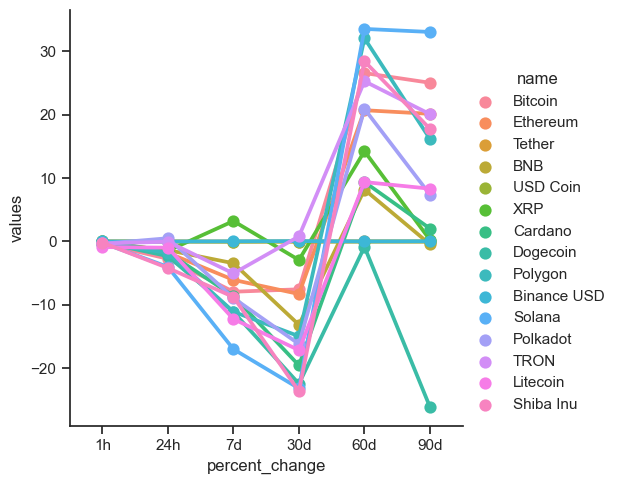

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df13, kind='point')
plt.show()

In [158]:
df22 = df[['name', 'quote.USD.price','quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']]
df22 = df22.query('name == "Ethereum"')
df22

,name,quote.USD.price,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
1,Ethereum,1526.510379,-0.128197,-1.798298,-6.060423,-8.291081,20.70615,20.137783


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


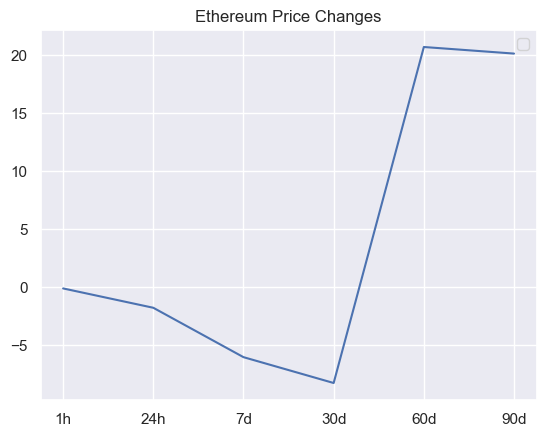

In [174]:
import matplotlib.pyplot as plt

# Filter data for Ethereum
eth_data = df22.query('name == "Ethereum"')

# Set x-axis labels
x = ['1h', '24h', '7d', '30d', '60d', '90d']

# Plot percentage change over time periods
plt.plot(time_periods, [eth_data['quote.USD.percent_change_1h'], 
                        eth_data['quote.USD.percent_change_24h'],
                        eth_data['quote.USD.percent_change_7d'], 
                        eth_data['quote.USD.percent_change_30d'], 
                        eth_data['quote.USD.percent_change_60d'], 
                        eth_data['quote.USD.percent_change_90d']])
     

# Add chart title and legend
plt.title('Ethereum Price Changes')
plt.legend()

# Show plot
plt.show()